In [61]:
import pandas as pd

df = pd.read_csv('C:/Users/ASUS/Downloads/TUGASKU/Dicoding/Lintasarta/Project2-MembuatModelMachineLearningdenganDataTimeSeries/Gold Price (2013-2023).csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [63]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        5
Change %    0
dtype: int64

In [64]:
df['date']=pd.to_datetime(df['Date'])
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,date
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%,2022-12-30
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%,2022-12-29
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%,2022-12-28
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%,2022-12-27
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%,2022-12-26


In [65]:
df.dtypes

Date                object
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
date        datetime64[ns]
dtype: object

In [66]:
# Mengonversi tipe data kolom ke objek jika belum
df['Change'] = df['Change %'].astype(str)
df['Price'] = df['Price'].astype(str)

# Menghapus karakter non-numerik dan mengonversi tipe data kolom
df['Change'] = df['Change %'].str.rstrip('%').astype(float) / 100
df['Price'] = df['Price'].str.replace(',', '').astype(float)

print(df)

            Date   Price      Open      High       Low     Vol. Change %  \
0     12/30/2022  1826.2  1,821.80  1,832.40  1,819.80  107.50K    0.01%   
1     12/29/2022  1826.0  1,812.30  1,827.30  1,811.20  105.99K    0.56%   
2     12/28/2022  1815.8  1,822.40  1,822.80  1,804.20  118.08K   -0.40%   
3     12/27/2022  1823.1  1,808.20  1,841.90  1,808.00  159.62K    0.74%   
4     12/26/2022  1809.7  1,805.80  1,811.95  1,805.55      NaN    0.30%   
...          ...     ...       ...       ...       ...      ...      ...   
2578  01/08/2013  1663.2  1,651.50  1,662.60  1,648.80    0.13K    0.97%   
2579  01/07/2013  1647.2  1,657.30  1,663.80  1,645.30    0.09K   -0.16%   
2580  01/04/2013  1649.9  1,664.40  1,664.40  1,630.00    0.31K   -1.53%   
2581  01/03/2013  1675.6  1,688.00  1,689.30  1,664.30    0.19K   -0.85%   
2582  01/02/2013  1689.9  1,675.80  1,695.00  1,672.10    0.06K    0.78%   

           date  Change  
0    2022-12-30  0.0001  
1    2022-12-29  0.0056  
2    2022

In [67]:
df.dtypes

Date                object
Price              float64
Open                object
High                object
Low                 object
Vol.                object
Change %            object
date        datetime64[ns]
Change             float64
dtype: object

In [68]:
new_df = df.drop('Date', axis = 1)
new_df.set_index('date', inplace = True)
new_df

,Price,Open,High,Low,Vol.,Change %,Change
date,,,,,,,
2022-12-30,1826.2,"1,821.80","1,832.40","1,819.80",107.50K,0.01%,0.0001
2022-12-29,1826.0,"1,812.30","1,827.30","1,811.20",105.99K,0.56%,0.0056
2022-12-28,1815.8,"1,822.40","1,822.80","1,804.20",118.08K,-0.40%,-0.0040
2022-12-27,1823.1,"1,808.20","1,841.90","1,808.00",159.62K,0.74%,0.0074
2022-12-26,1809.7,"1,805.80","1,811.95","1,805.55",NaN,0.30%,0.0030
...,...,...,...,...,...,...,...
2013-01-08,1663.2,"1,651.50","1,662.60","1,648.80",0.13K,0.97%,0.0097
2013-01-07,1647.2,"1,657.30","1,663.80","1,645.30",0.09K,-0.16%,-0.0016
2013-01-04,1649.9,"1,664.40","1,664.40","1,630.00",0.31K,-1.53%,-0.0153


In [69]:
new_df.dtypes

Price       float64
Open         object
High         object
Low          object
Vol.         object
Change %     object
Change      float64
dtype: object

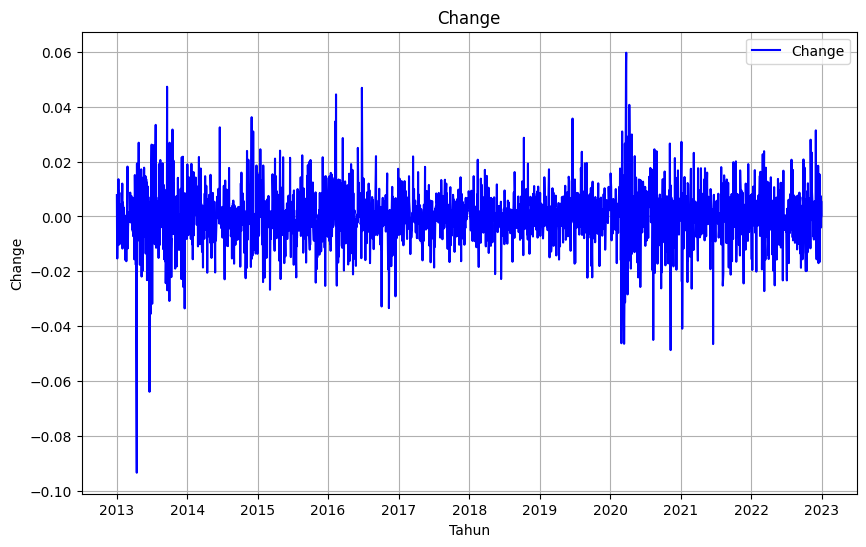

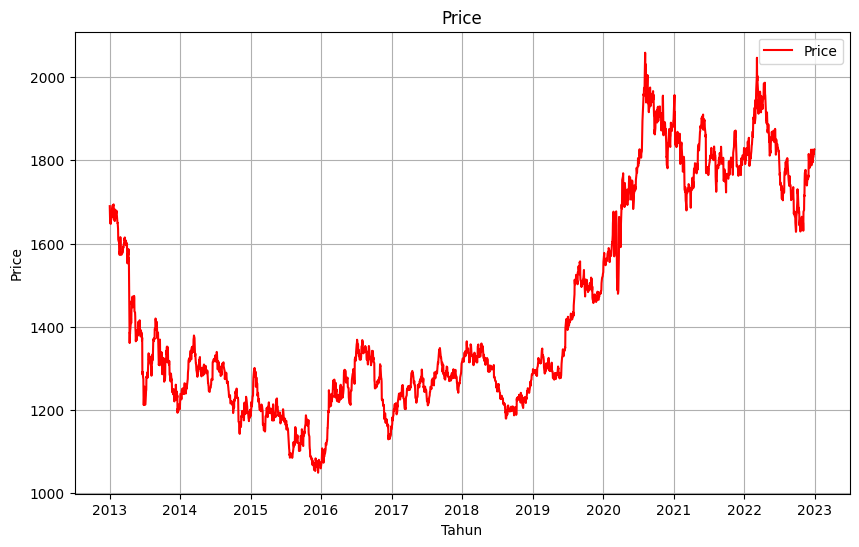

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Change'], label='Change', color='blue', linestyle='-')
plt.title('Change')
plt.xlabel('Tahun')
plt.ylabel('Change')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Price'], label='Price', color='red', linestyle='-')
plt.title('Price')
plt.xlabel('Tahun')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [71]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Normalisasi fitur-fitur dalam DataFrame (misalnya, kolom 'Price' dan 'Change %')
normalized_features = scaler.fit_transform(df[['Price', 'Change']])

# Mengganti fitur-fitur dalam DataFrame dengan fitur-fitur yang sudah dinormalisasi
df[['Price', 'Change']] = normalized_features

# Tampilkan DataFrame setelah normalisasi
print(df)


            Date     Price      Open      High       Low     Vol. Change %  \
0     12/30/2022  1.499770  1,821.80  1,832.40  1,819.80  107.50K    0.01%   
1     12/29/2022  1.498993  1,812.30  1,827.30  1,811.20  105.99K    0.56%   
2     12/28/2022  1.459349  1,822.40  1,822.80  1,804.20  118.08K   -0.40%   
3     12/27/2022  1.487721  1,808.20  1,841.90  1,808.00  159.62K    0.74%   
4     12/26/2022  1.435640  1,805.80  1,811.95  1,805.55      NaN    0.30%   
...          ...       ...       ...       ...       ...      ...      ...   
2578  01/08/2013  0.866240  1,651.50  1,662.60  1,648.80    0.13K    0.97%   
2579  01/07/2013  0.804053  1,657.30  1,663.80  1,645.30    0.09K   -0.16%   
2580  01/04/2013  0.814547  1,664.40  1,664.40  1,630.00    0.31K   -1.53%   
2581  01/03/2013  0.914435  1,688.00  1,689.30  1,664.30    0.19K   -0.85%   
2582  01/02/2013  0.970015  1,675.80  1,695.00  1,672.10    0.06K    0.78%   

           date    Change  
0    2022-12-30  0.001926  
1    20

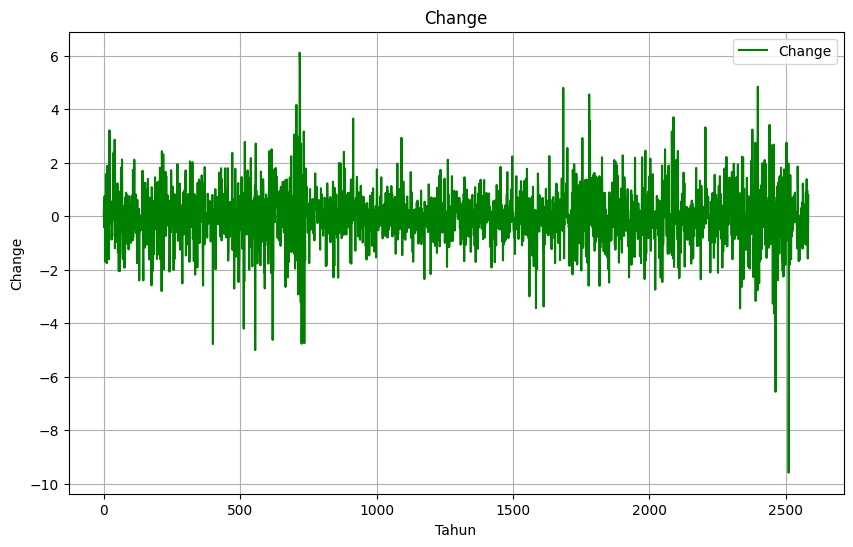

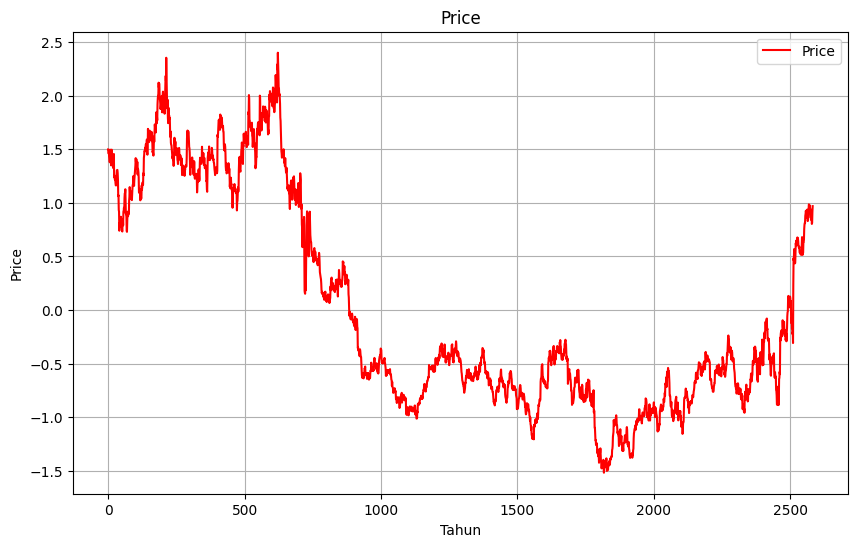

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Change'], label='Change', color='green', linestyle='-')
plt.title('Change')
plt.xlabel('Tahun')
plt.ylabel('Change')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Price', color='red', linestyle='-')
plt.title('Price')
plt.xlabel('Tahun')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [73]:
date = df['date'].values
energy = df['Change'].values

print(date.shape)
print(energy.shape)

(2583,)
(2583,)


In [74]:
from sklearn.model_selection import train_test_split

date_train, date_test, energy_train, energy_test = train_test_split(date, energy, test_size = 0.2, shuffle = False, random_state=123)

In [75]:
from sklearn.preprocessing import StandardScaler

energy_train = energy_train.reshape(-1, 1)
energy_test = energy_test.reshape(-1, 1)

# menghindari data leakage
scaler = StandardScaler()
scaler.fit_transform(energy_train)
scaler.transform(energy_test)

array([[ 1.67951999e-01],
       [-1.50261041e+00],
       [ 1.70834072e+00],
       [-1.24226302e+00],
       [ 1.99038372e+00],
       [-4.39525241e-01],
       [-1.90025660e-01],
       [-1.49176260e+00],
       [ 8.11695362e-02],
       [ 5.23488114e-03],
       [-5.61292672e-03],
       [-1.23141522e+00],
       [-1.33989329e+00],
       [-2.98503739e-01],
       [-3.63590586e-01],
       [-2.55112508e-01],
       [ 3.33551190e+00],
       [ 3.84908156e-01],
       [-1.57854507e+00],
       [-1.14091005e-01],
       [ 8.18820471e-01],
       [-1.69787095e+00],
       [ 3.89959791e+00],
       [-2.73085425e-02],
       [-2.02330519e+00],
       [-2.73085425e-02],
       [ 9.20173441e-02],
       [-1.90025660e-01],
       [ 6.01864314e-01],
       [-3.09351547e-01],
       [-3.20199355e-01],
       [ 1.22018936e+00],
       [-2.22569084e-01],
       [ 2.21818769e+00],
       [ 2.00495423e-01],
       [-3.96134010e-01],
       [ 2.76430078e-01],
       [-9.49372211e-01],
       [ 2.5

In [76]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift = 1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))

    return ds.batch(batch_size).prefetch(1)

In [77]:
print(len(energy_train), len(energy_test))

2066 517


In [78]:
x_energy_train = windowed_dataset(energy_train, window_size=60, batch_size=100, shuffle_buffer=5000)
x_energy_test = windowed_dataset(energy_test, window_size=60, batch_size=100, shuffle_buffer=5000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(128, return_sequences = True, input_shape=[None, 1]),
  tf.keras.layers.LSTM(256, return_sequences= True),
  tf.keras.layers.LSTM(128),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [79]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [80]:
threshold_mae = (df['Change'].max() - df['Change'].min()) * 10/100
print(threshold_mae)

1.570187663228518


In [81]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < threshold_mae) and (logs.get('val_mae') < threshold_mae):
      self.model.stop_training = True
      print("\nMAE < 10% dari skala data")
callbacks = myCallback()


#train
tf.keras.backend.set_floatx('float64')
history = model.fit(x_energy_train,
                    validation_data = x_energy_test,
                    epochs=10,
                    callbacks = [callbacks]
                    )

Epoch 1/10


     21/Unknown - 26s 988ms/step - loss: 0.3370 - mae: 0.6618
MAE < 10% dari skala data
21/21 [==============================] - 29s 1s/step - loss: 0.3370 - mae: 0.6618 - val_loss: 0.4606 - val_mae: 0.8002


In [82]:
print("MAE terakhir: ", history.history['mae'][-1])
print("Val MAE terakhir: ", history.history['val_mae'][-1])

MAE terakhir:  0.6617666865190879
Val MAE terakhir:  0.8001807081888156
